# Exploratory data analysis

In the [preprocessing workbook](Preprocessing.ipynb) we cleaned the data. Let's do some plotting here. We'll vary the types of plots just for learning purposes.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sc

In [146]:
data = pd.read_csv('survey_cleaned.csv')

## Age

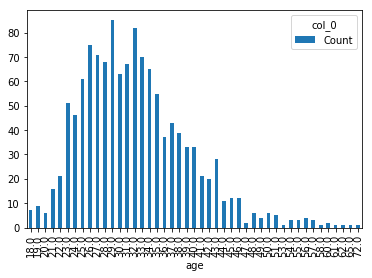

In [5]:
pd.crosstab(data['age'], columns='Count').plot(kind='bar')

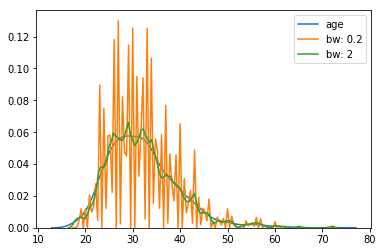

In [120]:
sns.kdeplot(data['age'])
sns.kdeplot(data['age'], bw=.2, label="bw: 0.2")
sns.kdeplot(data['age'], bw=.5, label="bw: 2")
plt.legend();

In [148]:
data['gender']


0       f
1       m
2       m
3       m
4       m
5       m
6       f
7       m
8       f
9       m
10      m
11      m
12      f
13      m
14      m
15      f
16      m
17      m
18      m
19      m
20      m
21      m
22      m
23      m
24      m
25      m
26      m
27      f
28      m
29      m
       ..
1221    m
1222    f
1223    m
1224    m
1225    m
1226    n
1227    m
1228    m
1229    m
1230    m
1231    m
1232    m
1233    m
1234    m
1235    f
1236    f
1237    m
1238    m
1239    m
1240    f
1241    m
1242    m
1243    m
1244    m
1245    m
1246    m
1247    m
1248    m
1249    f
1250    m
Name: gender, Length: 1251, dtype: object

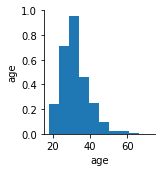

In [141]:
sns.pairplot(data[['age', 'gender']]);


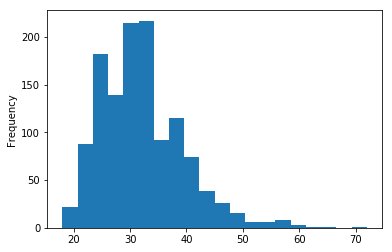

In [6]:
data['age'].plot(kind='hist', bins=20)

## Gender

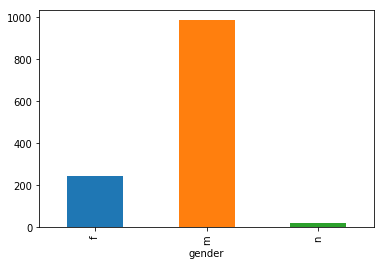

In [19]:
ax = data.groupby('gender').count().plot.bar(y='age', legend=False)

## Country

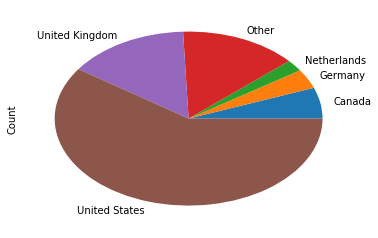

In [146]:
#data[data['country'].notnull()].plot.pie(y='country')
d = data['country']
dct = pd.crosstab(data['country'].fillna(''), columns='Count')
top5 = dct.sort_values(by='Count', ascending=False)[:5].index
dct['country'] = dct.index
f = lambda x: x not in top5
dct.loc[dct['country'].map(f), 'country'] = 'Other'
dct['Count'].groupby(dct['country']).sum().plot.pie()

### State

Text(0.5,0,'#')

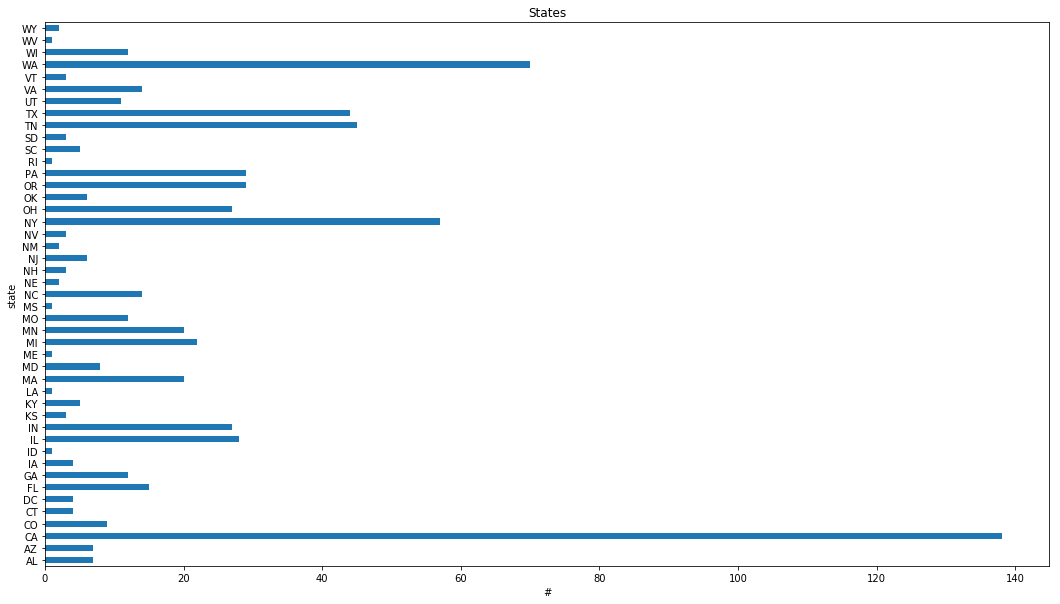

In [60]:
state = pd.crosstab(data['state'], columns='Count')
a = state.plot.barh(figsize=(18,10), legend=False, title='States')
a.set_xlabel('#')

## Treatment

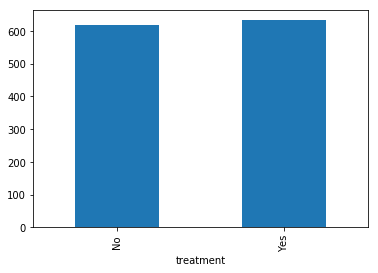

In [88]:
pd.crosstab(data['treatment'], columns='Count').plot.bar(legend=False)

## Correlogram of everything

In [10]:
data.columns

Index(['Unnamed: 0', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'date', 'time',
       'work_interfere_no', 'no_employees_number', 'leave_number',
       'mental_health_consequence_no', 'phys_health_consequence_no',
       'coworkers_no', 'supervisor_no', 'mental_health_interview_no',
       'phys_health_interview_no', 'mental_vs_physical_number', 'has_comment'],
      dtype='object')